In [ ]:
#resident
# %101% Single family - 4
# %104% Two family - 8
# %105% Three family - 12
# %111% 4-8 units -24
# %112% >8 units  -40
# %121% Boarding house

#Commercial

#Office

In [ ]:
#'Cemetery','Charitable/Religious','Government Operations',
#设施可用 -'Health','Higher Education','Education'，'Mixed Use Education'，'Privately-Owned Open Space'，'Public Open Space'，'Transportation'，Utilty
#空置 - 'Vacant Commercial'，'Vacant Industrial'，'Vacant Residential'

#resident
#'Assisted Living/Boarding House'
#'Education Residential'，'Residential'
#'Mixed Use Residential'

#Local business
#'Commercial'
#'Mixed Use Commercial'

#Industry group
#'Industrial'
#'Office'
#'Office/R&D'

In [97]:
import geopandas as gpd
import pandas as pd
import numpy as np
from pyproj import Transformer

try:
    apply = apply
except NameError:
    def apply(f,*args,**kw):
        return f(*args,**kw)

In [112]:
#读取数据
land_shp = '../data/CDD_LandUseKD.geojson'
building_shp = '../data/BASEMAP_BuildingsKD.geojson'
boundary_shp = '../data/kendallsquare.geojson'

#建筑与地块裁切
land_data = gpd.read_file(land_shp)
building_data = gpd.read_file(building_shp)
boundary_data =gpd.read_file(boundary_shp)
# building_data = building_data.rename(columns={'Shape_area': 'building_area'})

# 定义转换器，从 EPSG:4326 到 EPSG:3857
transformer = Transformer.from_crs("EPSG:4326","EPSG:3857", always_xy=True)
# 转换图层的坐标参考系统
building_data = building_data.to_crs("EPSG:3857")
# 计算多边形的面积，并转换为平方米
building_data['bu_area_sqm'] = building_data.geometry.area
building_data = building_data.to_crs("EPSG:4326")

land_data = land_data.to_crs("EPSG:3857")
land_data['ld_area_sqm'] = land_data.geometry.area
land_data = land_data.to_crs("EPSG:4326")


land_data.head()

,ML,MAP,LOT,Location,LandArea,LUCode,LUDesc,Category,ExistUnits,MixedUseTy,GQLodgingH,GradStuden,CondoFlag,TaxStatus,Shape_STAr,Shape_STLe,geometry,ld_area_sqm
0,16-33,16,33,270 THIRD ST,17436.0,013,MULTIUSE-RES,Mixed Use Residential,91.0,None,None,None,None,None,17011.857591,577.886930,"MULTIPOLYGON (((-71.08165 42.36627, -71.08188 ...",2897.115969
1,47-85,47,85,84 WADSWORTH ST,33621.0,390,COM-DEV-LAND,Vacant Commercial,0.0,None,None,None,None,Educ NonTax,33121.022346,774.777682,"MULTIPOLYGON (((-71.08371 42.36202, -71.08374 ...",5639.734454
2,48-157,48,157,314 MAIN ST,43430.0,340,GEN-OFFICE,Office,0.0,None,None,None,None,None,37986.329106,790.756105,"MULTIPOLYGON (((-71.08629 42.36186, -71.08647 ...",6468.265898
3,47-4,47,4,180 MAIN ST,30450.0,942,Private College,Higher Education,0.0,None,None,None,None,Educ NonTax,30954.198756,749.281516,"MULTIPOLYGON (((-71.08325 42.36196, -71.08335 ...",5270.766963
4,47-80,47,80,46 MEMORIAL DR,123273.0,942,Private College,Higher Education,0.0,None,None,None,None,Educ NonTax,123168.068201,1899.484240,"MULTIPOLYGON (((-71.08245 42.36190, -71.08252 ...",20971.704628


In [158]:
land_data[land_data['ML']== '29-50']

,ML,MAP,LOT,Location,LandArea,LUCode,LUDesc,Category,ExistUnits,MixedUseTy,GQLodgingH,GradStuden,CondoFlag,TaxStatus,Shape_STAr,Shape_STLe,geometry,ld_area_sqm
70,29-50,29,50,220 Binney St,155846.0,340,GEN-OFFICE,Office,0.0,None,None,None,None,Federal NonTax,179643.588387,1792.386289,"MULTIPOLYGON (((-71.08457 42.36581, -71.08460 ...",30592.552355


In [113]:
building_data.head()
# building_data.plot(markersize=.5);

,TYPE,BASE_ELEV,ELEV_SL,TOP_SL,ELEV_GL,TOP_GL,BldgID,EditDate,created_da,last_edite,Shape_area,Shape_len,geometry,bu_area_sqm
0,OVHD-WALKWAY,9.2,50.3,53.3,41.1,44.1,999-3381,None,2020-04-27,2021-10-20,700.714090,151.602427,"MULTIPOLYGON (((-71.08464 42.36090, -71.08467 ...",12.598554
1,OVHD-WALKWAY,9.3,54.5,54.5,45.2,45.2,999-3384,None,2020-04-27,2021-10-20,582.257743,148.320478,"MULTIPOLYGON (((-71.08412 42.36052, -71.08416 ...",30.406711
2,OVHD-WALKWAY,7.0,118.5,118.5,111.5,111.5,999-3386,None,2020-04-27,2021-10-20,178.217414,56.984752,"MULTIPOLYGON (((-71.08602 42.36012, -71.08605 ...",30.344750
3,BLDG,8.0,44.4,63.5,36.4,55.5,696-7,None,2020-04-27,2020-04-27,7016.927026,482.230028,"MULTIPOLYGON (((-71.08679 42.35972, -71.08686 ...",1194.739239
4,BLDG,10.7,26.8,28.0,16.1,17.3,696-6,None,2020-04-27,2020-04-27,300.621583,73.340090,"MULTIPOLYGON (((-71.08684 42.35980, -71.08688 ...",51.185774


In [118]:
# 按地块和用地类型分组，并计算建筑面积总和
groupedLandBuilding_data = gpd.sjoin(land_data, building_data, op='intersects')

groupedLandBuilding_data['floor'] = np.floor(groupedLandBuilding_data['ELEV_GL'] * 0.3048 / 4.23)
#计算建筑面积
groupedLandBuilding_data['floor_area'] = groupedLandBuilding_data['floor'] * groupedLandBuilding_data['bu_area_sqm']

# calculate FAR
groupedLandBuilding_data['FAR'] = groupedLandBuilding_data['floor_area']/groupedLandBuilding_data['ld_area_sqm']

groupedLandBuilding_data

/Users/majue/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,ML,MAP,LOT,Location,LandArea,LUCode,LUDesc,Category,ExistUnits,MixedUseTy,...,BldgID,EditDate,created_da,last_edite,Shape_area,Shape_len,bu_area_sqm,floor,floor_area,FAR
0,16-33,16,33,270 THIRD ST,17436.0,013,MULTIUSE-RES,Mixed Use Residential,91.0,None,...,590-1,None,2020-04-27,2020-04-27,11541.043784,509.419745,1965.436314,7.0,13758.054199,4.748879
1,47-85,47,85,84 WADSWORTH ST,33621.0,390,COM-DEV-LAND,Vacant Commercial,0.0,None,...,680-2,None,2020-04-27,2020-04-27,5799.000746,304.637630,987.434750,18.0,17773.825509,3.151536
3,47-4,47,4,180 MAIN ST,30450.0,942,Private College,Higher Education,0.0,None,...,680-2,None,2020-04-27,2020-04-27,5799.000746,304.637630,987.434750,18.0,17773.825509,3.372152
1,47-85,47,85,84 WADSWORTH ST,33621.0,390,COM-DEV-LAND,Vacant Commercial,0.0,None,...,680-1,2021,2021-02-10,2021-02-10,192.117137,56.316862,32.713396,0.0,0.000000,0.000000
2,48-157,48,157,314 MAIN ST,43430.0,340,GEN-OFFICE,Office,0.0,None,...,674-1,2020,2020-04-27,2020-04-27,30064.518560,696.834530,5119.350709,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,44-104,44,104,80-90 Broadway,41170.0,346,INV-OFFICE,Office,0.0,None,...,643-7,None,2021-04-07,2021-04-07,16453.843928,568.948509,2801.841079,12.0,33622.092950,4.407303
168,44-105,44,105,355 Man Street,48814.0,346,INV-OFFICE,Office,0.0,None,...,643-7,None,2021-04-07,2021-04-07,16453.843928,568.948509,2801.841079,12.0,33622.092950,4.002677
167,44-104,44,104,80-90 Broadway,41170.0,346,INV-OFFICE,Office,0.0,None,...,643-1,None,2020-04-27,2020-04-27,20253.308569,636.521188,3448.859441,11.0,37937.453854,4.972975
168,44-105,44,105,355 Man Street,48814.0,346,INV-OFFICE,Office,0.0,None,...,999-5039,None,2020-04-27,2021-10-20,265.397494,67.560990,40.612645,4.0,162.450578,0.019340


In [85]:
groupedLandBuilding_data.columns

Index(['ML', 'MAP', 'LOT', 'Location', 'LandArea', 'LUCode', 'LUDesc',
       'Category', 'ExistUnits', 'MixedUseTy', 'GQLodgingH', 'GradStuden',
       'CondoFlag', 'TaxStatus', 'Shape_STAr', 'Shape_STLe', 'geometry',
       'index_right', 'TYPE', 'BASE_ELEV', 'ELEV_SL', 'TOP_SL', 'ELEV_GL',
       'TOP_GL', 'BldgID', 'EditDate', 'created_da', 'last_edite',
       'Shape_area', 'Shape_len', 'area_sqm', 'floor_area'],
      dtype='object')

In [119]:
columns = ['ML','Location','LandArea','LUCode','LUDesc','Category','ExistUnits','TYPE','BldgID','floor','floor_area','FAR','geometry']
land_building = groupedLandBuilding_data[columns]

In [120]:
land_building

,ML,Location,LandArea,LUCode,LUDesc,Category,ExistUnits,TYPE,BldgID,floor,floor_area,FAR,geometry
0,16-33,270 THIRD ST,17436.0,013,MULTIUSE-RES,Mixed Use Residential,91.0,BLDG,590-1,7.0,13758.054199,4.748879,"MULTIPOLYGON (((-71.08165 42.36627, -71.08188 ..."
1,47-85,84 WADSWORTH ST,33621.0,390,COM-DEV-LAND,Vacant Commercial,0.0,BLDG,680-2,18.0,17773.825509,3.151536,"MULTIPOLYGON (((-71.08371 42.36202, -71.08374 ..."
3,47-4,180 MAIN ST,30450.0,942,Private College,Higher Education,0.0,BLDG,680-2,18.0,17773.825509,3.372152,"MULTIPOLYGON (((-71.08325 42.36196, -71.08335 ..."
1,47-85,84 WADSWORTH ST,33621.0,390,COM-DEV-LAND,Vacant Commercial,0.0,BLDG,680-1,0.0,0.000000,0.000000,"MULTIPOLYGON (((-71.08371 42.36202, -71.08374 ..."
2,48-157,314 MAIN ST,43430.0,340,GEN-OFFICE,Office,0.0,FOUNDATION,674-1,0.0,0.000000,0.000000,"MULTIPOLYGON (((-71.08629 42.36186, -71.08647 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,44-104,80-90 Broadway,41170.0,346,INV-OFFICE,Office,0.0,BLDG,643-7,12.0,33622.092950,4.407303,"MULTIPOLYGON (((-71.08652 42.36344, -71.08653 ..."
168,44-105,355 Man Street,48814.0,346,INV-OFFICE,Office,0.0,BLDG,643-7,12.0,33622.092950,4.002677,"MULTIPOLYGON (((-71.08747 42.36319, -71.08743 ..."
167,44-104,80-90 Broadway,41170.0,346,INV-OFFICE,Office,0.0,BLDG,643-1,11.0,37937.453854,4.972975,"MULTIPOLYGON (((-71.08652 42.36344, -71.08653 ..."
168,44-105,355 Man Street,48814.0,346,INV-OFFICE,Office,0.0,OVHD-WALKWAY,999-5039,4.0,162.450578,0.019340,"MULTIPOLYGON (((-71.08747 42.36319, -71.08743 ..."


In [159]:
land_building[land_building['ML']== '29-50']

,ML,Location,LandArea,LUCode,LUDesc,Category,ExistUnits,TYPE,BldgID,floor,floor_area,FAR,geometry
70,29-50,220 Binney St,155846.0,340,GEN-OFFICE,Office,0.0,OUTBLDG,999-3872,0.0,0.0,0.0,"MULTIPOLYGON (((-71.08457 42.36581, -71.08460 ..."
70,29-50,220 Binney St,155846.0,340,GEN-OFFICE,Office,0.0,CONSTRUCT,591-6,0.0,0.0,0.0,"MULTIPOLYGON (((-71.08457 42.36581, -71.08460 ..."


/Users/majue/opt/anaconda3/lib/python3.9/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


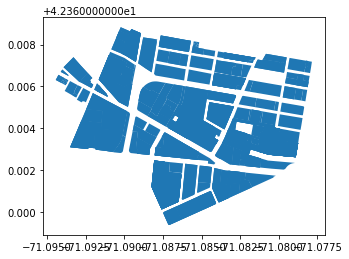

In [121]:
land_building.plot(markersize=.5);

# 包含地理位置信息的角色

In [122]:
land_building.Category.value_counts()

Office                        73
Office/R&D                    47
Utility                       44
Residential                   35
Higher Education              27
Transportation                19
Commercial                    18
Government Operations         17
Mixed Use Residential         12
Industrial                    11
Vacant Commercial              8
Privately-Owned Open Space     8
Education Residential          5
Public Open Space              4
Charitable/Religious           2
Mixed Use Commercial           1
Name: Category, dtype: int64

In [123]:
LB_data = land_building.copy()
LB_data.loc[LB_data['Category'].isin(['Commercial', 'Mixed Use Commercial', 'Privately-Owned Open Space']), 'stakeholder'] = 'LBO'
LB_data.loc[LB_data['Category'].isin(['Industrial', 'Office', 'Office/R&D']), 'stakeholder'] = 'IG'
LB_data.loc[LB_data['Category'].isin(['Assisted Living/Boarding House', 'Education Residential', 'Residential', 'Mixed Use Residential']), 'stakeholder'] = 'RS'
LB_data.loc[LB_data['Category'].isin(['Utility', 'Transportation', 'Government Operations', 'Public Open Space']), 'stakeholder'] = 'GOV'
LB_data.loc[LB_data['Category'].isin(['Charitable/Religious', 'Higher Education']), 'stakeholder'] = 'NPI'
LB_data.loc[LB_data['Category'].isin(['Vacant Commercial']), 'stakeholder'] = 'DEV'
LB_data.loc[LB_data['ML'].isin(['29-50']), 'stakeholder'] = 'DEV'
LB_data

,ML,Location,LandArea,LUCode,LUDesc,Category,ExistUnits,TYPE,BldgID,floor,floor_area,FAR,geometry,stakeholder
0,16-33,270 THIRD ST,17436.0,013,MULTIUSE-RES,Mixed Use Residential,91.0,BLDG,590-1,7.0,13758.054199,4.748879,"MULTIPOLYGON (((-71.08165 42.36627, -71.08188 ...",RS
1,47-85,84 WADSWORTH ST,33621.0,390,COM-DEV-LAND,Vacant Commercial,0.0,BLDG,680-2,18.0,17773.825509,3.151536,"MULTIPOLYGON (((-71.08371 42.36202, -71.08374 ...",DEV
3,47-4,180 MAIN ST,30450.0,942,Private College,Higher Education,0.0,BLDG,680-2,18.0,17773.825509,3.372152,"MULTIPOLYGON (((-71.08325 42.36196, -71.08335 ...",NPI
1,47-85,84 WADSWORTH ST,33621.0,390,COM-DEV-LAND,Vacant Commercial,0.0,BLDG,680-1,0.0,0.000000,0.000000,"MULTIPOLYGON (((-71.08371 42.36202, -71.08374 ...",DEV
2,48-157,314 MAIN ST,43430.0,340,GEN-OFFICE,Office,0.0,FOUNDATION,674-1,0.0,0.000000,0.000000,"MULTIPOLYGON (((-71.08629 42.36186, -71.08647 ...",IG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,44-104,80-90 Broadway,41170.0,346,INV-OFFICE,Office,0.0,BLDG,643-7,12.0,33622.092950,4.407303,"MULTIPOLYGON (((-71.08652 42.36344, -71.08653 ...",IG
168,44-105,355 Man Street,48814.0,346,INV-OFFICE,Office,0.0,BLDG,643-7,12.0,33622.092950,4.002677,"MULTIPOLYGON (((-71.08747 42.36319, -71.08743 ...",IG
167,44-104,80-90 Broadway,41170.0,346,INV-OFFICE,Office,0.0,BLDG,643-1,11.0,37937.453854,4.972975,"MULTIPOLYGON (((-71.08652 42.36344, -71.08653 ...",IG
168,44-105,355 Man Street,48814.0,346,INV-OFFICE,Office,0.0,OVHD-WALKWAY,999-5039,4.0,162.450578,0.019340,"MULTIPOLYGON (((-71.08747 42.36319, -71.08743 ...",IG


In [147]:
# 重新设置索引，去除重复的标签
LB_data = LB_data.reset_index(drop=True)
# get stakeholder pop_num from building area per capita
LB_data['pop_num'] = 0
LB_data.loc[LB_data['stakeholder'].isin(['LBO']), 'pop_num'] = LB_data['floor_area'] / 40  # workforce 40 sqft/person
LB_data.loc[LB_data['stakeholder'].isin(['IG']), 'pop_num'] = LB_data['floor_area'] / 200 # workforce 200 sqft/person
LB_data.loc[LB_data['stakeholder'].isin(['RS']), 'pop_num'] = LB_data['floor_area'] / 50 # resident 50 sqft/person  US average
LB_data.loc[LB_data['stakeholder'].isin(['GOV']), 'pop_num'] = LB_data['floor_area'] / 200  # workforce 50 sqm/person
LB_data.loc[LB_data['stakeholder'].isin(['NPI']), 'pop_num'] = LB_data['floor_area'] / 200  # workforce 50 sqm/person

In [148]:
LB_data

,ML,Location,LandArea,LUCode,LUDesc,Category,ExistUnits,TYPE,BldgID,floor,floor_area,FAR,geometry,stakeholder,pop_num
0,16-33,270 THIRD ST,17436.0,013,MULTIUSE-RES,Mixed Use Residential,91.0,BLDG,590-1,7.0,13758.054199,4.748879,"MULTIPOLYGON (((-71.08165 42.36627, -71.08188 ...",RS,275.161084
1,47-85,84 WADSWORTH ST,33621.0,390,COM-DEV-LAND,Vacant Commercial,0.0,BLDG,680-2,18.0,17773.825509,3.151536,"MULTIPOLYGON (((-71.08371 42.36202, -71.08374 ...",DEV,0.000000
2,47-4,180 MAIN ST,30450.0,942,Private College,Higher Education,0.0,BLDG,680-2,18.0,17773.825509,3.372152,"MULTIPOLYGON (((-71.08325 42.36196, -71.08335 ...",NPI,88.869128
3,47-85,84 WADSWORTH ST,33621.0,390,COM-DEV-LAND,Vacant Commercial,0.0,BLDG,680-1,0.0,0.000000,0.000000,"MULTIPOLYGON (((-71.08371 42.36202, -71.08374 ...",DEV,0.000000
4,48-157,314 MAIN ST,43430.0,340,GEN-OFFICE,Office,0.0,FOUNDATION,674-1,0.0,0.000000,0.000000,"MULTIPOLYGON (((-71.08629 42.36186, -71.08647 ...",IG,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,44-104,80-90 Broadway,41170.0,346,INV-OFFICE,Office,0.0,BLDG,643-7,12.0,33622.092950,4.407303,"MULTIPOLYGON (((-71.08652 42.36344, -71.08653 ...",IG,168.110465
327,44-105,355 Man Street,48814.0,346,INV-OFFICE,Office,0.0,BLDG,643-7,12.0,33622.092950,4.002677,"MULTIPOLYGON (((-71.08747 42.36319, -71.08743 ...",IG,168.110465
328,44-104,80-90 Broadway,41170.0,346,INV-OFFICE,Office,0.0,BLDG,643-1,11.0,37937.453854,4.972975,"MULTIPOLYGON (((-71.08652 42.36344, -71.08653 ...",IG,189.687269
329,44-105,355 Man Street,48814.0,346,INV-OFFICE,Office,0.0,OVHD-WALKWAY,999-5039,4.0,162.450578,0.019340,"MULTIPOLYGON (((-71.08747 42.36319, -71.08743 ...",IG,0.812253


In [129]:
LB_data[LB_data['stakeholder']=='RS'].pop_num.sum()
# kendall square population 6,520

8155.1141748991195

In [150]:
work_IG = LB_data[LB_data['stakeholder']=='IG'].pop_num.sum()
work_LBO = LB_data[LB_data['stakeholder']=='LBO'].pop_num.sum()
work_GOV = LB_data[LB_data['stakeholder']=='GOV'].pop_num.sum()
work_NPI = LB_data[LB_data['stakeholder']=='NPI'].pop_num.sum()
work_num = work_IG + work_LBO + work_GOV + work_NPI
work_num

46549.01367050645

In [168]:
LB_data[LB_data['Category']=='Office/R&D'].pop_num.sum()/work_num

0.20703042767406638

In [43]:
bgrp = gpd.read_file('/Users/majue/Documents/MIT/multi_stakeholders_indicator_d3-1/backend/data/bgrp_cambridge.geojson')
bgrp

,id,label,name,geometry
0,250173546002,bgrp,"2 (Tract 3546, Middlesex, MA)","POLYGON ((-71.13286 42.38328, -71.13195 42.382..."
1,250173533001,bgrp,"1 (Tract 3533, Middlesex, MA)","POLYGON ((-71.10574 42.36182, -71.10556 42.361..."
2,250173550001,bgrp,"1 (Tract 3550, Middlesex, MA)","POLYGON ((-71.14066 42.39884, -71.14068 42.398..."
3,250173536005,bgrp,"5 (Tract 3536, Middlesex, MA)","POLYGON ((-71.11954 42.37631, -71.11948 42.376..."
4,250173544002,bgrp,"2 (Tract 3544, Middlesex, MA)","POLYGON ((-71.13697 42.38295, -71.13707 42.382..."
...,...,...,...,...
83,250173526001,bgrp,"1 (Tract 3526, Middlesex, MA)","POLYGON ((-71.09013 42.37158, -71.09066 42.370..."
84,250173530001,bgrp,"1 (Tract 3530, Middlesex, MA)","POLYGON ((-71.10541 42.36641, -71.10570 42.366..."
85,250173521021,bgrp,"1 (Tract 3521.02, Middlesex, MA)","POLYGON ((-71.07157 42.36723, -71.07145 42.367..."
86,250173540002,bgrp,"2 (Tract 3540, Middlesex, MA)","POLYGON ((-71.12407 42.38421, -71.12414 42.384..."


<AxesSubplot:>

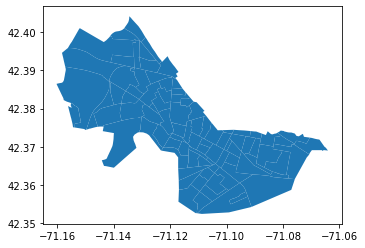

In [44]:
bgrp.plot()

In [130]:
pop = pd.read_csv('/Users/majue/Documents/MIT/Volpe/replica-test-04_20_23-population_dataset/replica-test-04_20_23-population_dataset.csv')
pop.head()

,person_id,household_id,age,sex,race_ethnicity,employment_status,wfh,individual_income,commute_mode,household_size,...,available_vehicles,resident_type,home_bgrp,home_trct,home_cty,home_st,work_bgrp,work_trct,work_cty,work_st
0,1080575451255828058,8708936110889382119,95,male,black_not_hispanic_or_latino,not_in_labor_force,unemployed_under_16_not_in_labor_force,11432,other_travel_mode,1,...,one,core,"2 (Tract 3538, Middlesex, MA)","3538 (Middlesex, MA)","Middlesex County, MA",Massachusetts,\N,\N,\N,\N
1,5457193592064276016,16502544353640454243,95,male,black_not_hispanic_or_latino,not_in_labor_force,unemployed_under_16_not_in_labor_force,11432,other_travel_mode,1,...,one,core,"2 (Tract 3523, Middlesex, MA)","3523 (Middlesex, MA)","Middlesex County, MA",Massachusetts,\N,\N,\N,\N
2,9418719122398331740,10796612515708179086,95,male,black_not_hispanic_or_latino,not_in_labor_force,unemployed_under_16_not_in_labor_force,11432,other_travel_mode,1,...,one,core,"3 (Tract 3532, Middlesex, MA)","3532 (Middlesex, MA)","Middlesex County, MA",Massachusetts,\N,\N,\N,\N
3,6520902190318608247,14808926745157455874,83,female,black_not_hispanic_or_latino,not_in_labor_force,unemployed_under_16_not_in_labor_force,14773,other_travel_mode,1,...,one,core,"3 (Tract 3543, Middlesex, MA)","3543 (Middlesex, MA)","Middlesex County, MA",Massachusetts,\N,\N,\N,\N
4,8955996023108459098,4932802100107204973,83,female,black_not_hispanic_or_latino,not_in_labor_force,unemployed_under_16_not_in_labor_force,14773,other_travel_mode,1,...,one,core,"1 (Tract 3537, Middlesex, MA)","3537 (Middlesex, MA)","Middlesex County, MA",Massachusetts,\N,\N,\N,\N


In [131]:
# 统计人口数据，bgrp level
# 根据 'home_trct' 分组并计算每个地块的人数
people_count = pop.groupby('home_bgrp').size().reset_index(name='count')
# 合并 'bgrp' DataFrame 和 'people_count' DataFrame，根据 'home_trct' 进行匹配
merged_data = bgrp.merge(people_count, left_on='name', right_on='home_bgrp', how='left')

# 打印合并结果
merged_data

,id,label,name,geometry,home_bgrp,count
0,250173546002,bgrp,"2 (Tract 3546, Middlesex, MA)","POLYGON ((-71.13286 42.38328, -71.13195 42.382...","2 (Tract 3546, Middlesex, MA)",860
1,250173533001,bgrp,"1 (Tract 3533, Middlesex, MA)","POLYGON ((-71.10574 42.36182, -71.10556 42.361...","1 (Tract 3533, Middlesex, MA)",1052
2,250173550001,bgrp,"1 (Tract 3550, Middlesex, MA)","POLYGON ((-71.14066 42.39884, -71.14068 42.398...","1 (Tract 3550, Middlesex, MA)",986
3,250173536005,bgrp,"5 (Tract 3536, Middlesex, MA)","POLYGON ((-71.11954 42.37631, -71.11948 42.376...","5 (Tract 3536, Middlesex, MA)",1974
4,250173544002,bgrp,"2 (Tract 3544, Middlesex, MA)","POLYGON ((-71.13697 42.38295, -71.13707 42.382...","2 (Tract 3544, Middlesex, MA)",1010
...,...,...,...,...,...,...
83,250173526001,bgrp,"1 (Tract 3526, Middlesex, MA)","POLYGON ((-71.09013 42.37158, -71.09066 42.370...","1 (Tract 3526, Middlesex, MA)",1059
84,250173530001,bgrp,"1 (Tract 3530, Middlesex, MA)","POLYGON ((-71.10541 42.36641, -71.10570 42.366...","1 (Tract 3530, Middlesex, MA)",20
85,250173521021,bgrp,"1 (Tract 3521.02, Middlesex, MA)","POLYGON ((-71.07157 42.36723, -71.07145 42.367...","1 (Tract 3521.02, Middlesex, MA)",1785
86,250173540002,bgrp,"2 (Tract 3540, Middlesex, MA)","POLYGON ((-71.12407 42.38421, -71.12414 42.384...","2 (Tract 3540, Middlesex, MA)",2108


<AxesSubplot:>

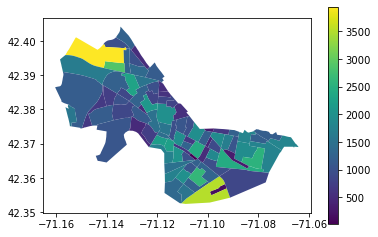

In [132]:
merged_data.plot(column='count', legend=True)

In [138]:
bgrp_id = ['250173521021','250173523001','250173523002','250173524001','250173524002','250173526001','250173531012','250173531022']
analysis_area = merged_data[merged_data['id'].isin(bgrp_id)]
analysis_area

,id,label,name,geometry,work_bgrp,count
23,250173524002,bgrp,"2 (Tract 3524, Middlesex, MA)","POLYGON ((-71.08254 42.36324, -71.08378 42.363...","2 (Tract 3524, Middlesex, MA)",17265
31,250173523001,bgrp,"1 (Tract 3523, Middlesex, MA)","POLYGON ((-71.08923 42.36554, -71.08677 42.364...","1 (Tract 3523, Middlesex, MA)",2279
41,250173531012,bgrp,"2 (Tract 3531.01, Middlesex, MA)","POLYGON ((-71.10117 42.36390, -71.10087 42.363...","2 (Tract 3531.01, Middlesex, MA)",4339
66,250173531022,bgrp,"2 (Tract 3531.02, Middlesex, MA)","POLYGON ((-71.08821 42.36261, -71.08891 42.362...","2 (Tract 3531.02, Middlesex, MA)",14770
79,250173523002,bgrp,"2 (Tract 3523, Middlesex, MA)","POLYGON ((-71.07806 42.36591, -71.07791 42.366...","2 (Tract 3523, Middlesex, MA)",7496
83,250173526001,bgrp,"1 (Tract 3526, Middlesex, MA)","POLYGON ((-71.09013 42.37158, -71.09066 42.370...","1 (Tract 3526, Middlesex, MA)",125
85,250173521021,bgrp,"1 (Tract 3521.02, Middlesex, MA)","POLYGON ((-71.07157 42.36723, -71.07145 42.367...","1 (Tract 3521.02, Middlesex, MA)",6480
87,250173524001,bgrp,"1 (Tract 3524, Middlesex, MA)","POLYGON ((-71.09180 42.36632, -71.09124 42.365...","1 (Tract 3524, Middlesex, MA)",1539


In [139]:
res_num = analysis_area['count'].sum()
res_num

54293

In [146]:
analysis_area.to_crs("EPSG:3857").area.sum()* 0.008

39989.44707769823

<AxesSubplot:>

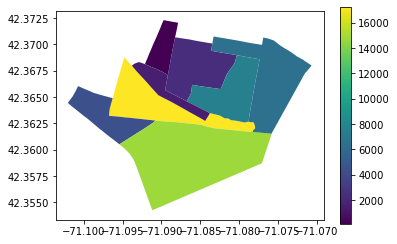

In [140]:
analysis_area.plot(column='count', legend=True)

In [109]:
work = pd.read_csv('/Users/majue/Documents/MIT/multi_stakeholders_indicator_d3-1/backend/data/replica-workforce_dataset.csv')
work.head()

,person_id,household_id,age,sex,race_ethnicity,employment_status,wfh,individual_income,commute_mode,household_size,...,available_vehicles,resident_type,home_bgrp,home_trct,home_cty,home_st,work_bgrp,work_trct,work_cty,work_st
0,12806380493944754724,15989382197808166668,50,male,white_not_hispanic_or_latino,employed,in_person,21927,private_auto,5,...,three_plus,core,"1 (Tract 9705, Bennington, VT)","9705 (Bennington, VT)","Bennington County, VT",Vermont,"2 (Tract 3523, Middlesex, MA)","3523 (Middlesex, MA)","Middlesex County, MA",Massachusetts
1,17904240322270692150,9488703958750988728,51,female,white_not_hispanic_or_latino,employed,in_person,61019,private_auto,4,...,one,core,"1 (Tract 9705, Bennington, VT)","9705 (Bennington, VT)","Bennington County, VT",Vermont,"2 (Tract 3523, Middlesex, MA)","3523 (Middlesex, MA)","Middlesex County, MA",Massachusetts
2,4883733951303108711,5836213770753880991,20,male,black_not_hispanic_or_latino,employed,in_person,8239,private_auto,3,...,three_plus,core,"1 (Tract 3011.02, Middlesex, MA)","3011.02 (Middlesex, MA)","Middlesex County, MA",Massachusetts,"2 (Tract 3524, Middlesex, MA)","3524 (Middlesex, MA)","Middlesex County, MA",Massachusetts
3,13595548637453668386,4862965933270668524,30,female,white_not_hispanic_or_latino,not_in_labor_force,unemployed_under_16_not_in_labor_force,0,other_travel_mode,3,...,three_plus,core,"3 (Tract 3011.02, Middlesex, MA)","3011.02 (Middlesex, MA)","Middlesex County, MA",Massachusetts,"5 (Tract 3536, Middlesex, MA)","3536 (Middlesex, MA)","Middlesex County, MA",Massachusetts
4,7251370034833445643,14322534064787053660,38,male,white_not_hispanic_or_latino,employed,in_person,67057,walking,5,...,zero,core,"3 (Tract 3271.02, Middlesex, MA)","3271.02 (Middlesex, MA)","Middlesex County, MA",Massachusetts,"2 (Tract 3524, Middlesex, MA)","3524 (Middlesex, MA)","Middlesex County, MA",Massachusetts


In [135]:
# 统计人口数据，bgrp level
# 根据 'home_trct' 分组并计算每个地块的人数
work_count = work.groupby('work_bgrp').size().reset_index(name='count')
# 合并 'bgrp' DataFrame 和 'people_count' DataFrame，根据 'home_trct' 进行匹配
merged_data = bgrp.merge(work_count, left_on='name', right_on='work_bgrp', how='left')

# 打印合并结果
merged_data

,id,label,name,geometry,work_bgrp,count
0,250173546002,bgrp,"2 (Tract 3546, Middlesex, MA)","POLYGON ((-71.13286 42.38328, -71.13195 42.382...","2 (Tract 3546, Middlesex, MA)",232
1,250173533001,bgrp,"1 (Tract 3533, Middlesex, MA)","POLYGON ((-71.10574 42.36182, -71.10556 42.361...","1 (Tract 3533, Middlesex, MA)",578
2,250173550001,bgrp,"1 (Tract 3550, Middlesex, MA)","POLYGON ((-71.14066 42.39884, -71.14068 42.398...","1 (Tract 3550, Middlesex, MA)",874
3,250173536005,bgrp,"5 (Tract 3536, Middlesex, MA)","POLYGON ((-71.11954 42.37631, -71.11948 42.376...","5 (Tract 3536, Middlesex, MA)",11184
4,250173544002,bgrp,"2 (Tract 3544, Middlesex, MA)","POLYGON ((-71.13697 42.38295, -71.13707 42.382...","2 (Tract 3544, Middlesex, MA)",198
...,...,...,...,...,...,...
83,250173526001,bgrp,"1 (Tract 3526, Middlesex, MA)","POLYGON ((-71.09013 42.37158, -71.09066 42.370...","1 (Tract 3526, Middlesex, MA)",125
84,250173530001,bgrp,"1 (Tract 3530, Middlesex, MA)","POLYGON ((-71.10541 42.36641, -71.10570 42.366...","1 (Tract 3530, Middlesex, MA)",316
85,250173521021,bgrp,"1 (Tract 3521.02, Middlesex, MA)","POLYGON ((-71.07157 42.36723, -71.07145 42.367...","1 (Tract 3521.02, Middlesex, MA)",6480
86,250173540002,bgrp,"2 (Tract 3540, Middlesex, MA)","POLYGON ((-71.12407 42.38421, -71.12414 42.384...","2 (Tract 3540, Middlesex, MA)",601


In [111]:
analysis_area = merged_data[merged_data['id'].isin(bgrp_id)]
work_num = analysis_area['count'].sum()
work_num

54293

<AxesSubplot:>

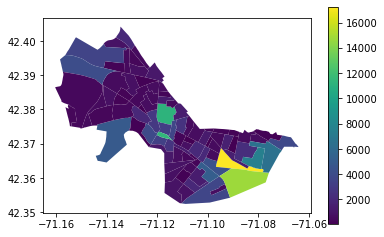

In [137]:
merged_data.plot(column='count', legend=True)

# ESE

In [152]:
current_rate = (4.91 + 4.91 + 5.7 +5.7) / 4 
current_rate 

5.305

In [155]:
def norm(data,max_value,min_value):
    normalized_value = (data - min_value) / (max_value - min_value)
    return normalized_value

In [165]:
a = norm(5.305, 5.7, 4.91)

In [ ]:
office_job = office_space /200
amenity_job = amenity_space /50
civic_job = civic_space /50
local_job_creation = office_job + amenity_job + civic_job

In [164]:
VOLPE_area = 30593
max_FAR = 3.25 # from cambridge zoning regulation https://www.cambridgema.gov/~/media/Files/CDD/ZoningDevel/zoningguide/zguide.ashx
max_value = VOLPE_area * max_FAR / 50
max_value
norm_value = norm(1000, max_value , 0)
b = norm_value
b

0.5028802466124729

In [ ]:
employment = (a+b)/2